## Utilities

In [15]:
figures_dir = "/home/liad/dev/research/figures"

def save_fig(fig, name, end="jpg"):
    full_path = f"{figures_dir}/{name}.{end}"
    fig.savefig(full_path)

# General

### CDT - Number of Associated Artifacts

NameError: name 'save_fig' is not defined

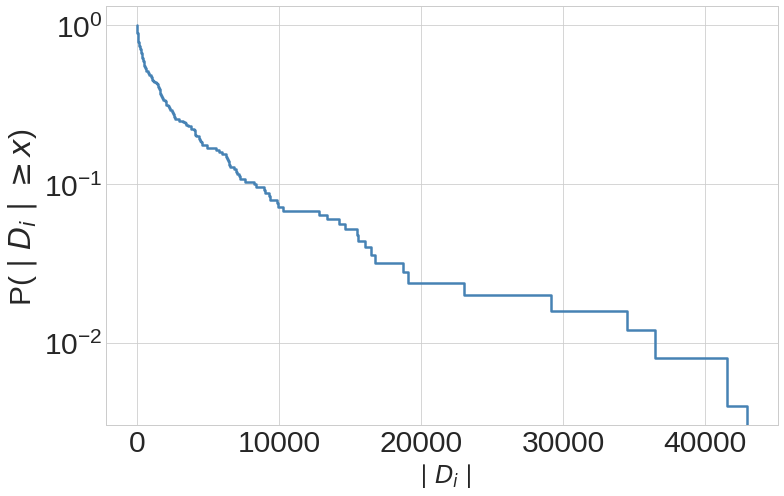

In [81]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

from matplotlib import rc
num_iocs_csv = "./data-vt-v22/attack_num_iocs_vt_v22.csv"
df = pd.read_csv(num_iocs_csv)

mu = 200
sigma = 25
n_bins = 200P

data = df['num_iocs']

fig, ax = plt.subplots(figsize=(11, 7))

sorted_data = np.sort(data)  # Or data.sort(), if data can be modified
# Cumulative counts:
plt.step(sorted_data[::-1], np.arange(0,1+1/250,1/250), linewidth=2.5, color="steelblue")
dir(plt)
plt.xlabel('$\\mid D_{i} \\mid$', fontsize=24)
# plt.ylabel('Number of Attacks', fontsize=24)
# plt.ylabel('# of Attacks with  Number of Associated Artifacts >= x', fontsize=24)
# plt.ylabel('$a_i such that \lvert D_i \rvert \geq x$', fontsize=24)
plt.ylabel('P($\\mid D_{i} \\mid \\geq x$)', fontsize=30)
# plt.ylabel('size of $\\{a_i \\mid \\mid D_i \\mid \\geq x  \\}\\mid$', fontsize=26)
ax.set_yscale('log')
ax.set_xscale('linear')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()

save_fig(fig, "cdt-num-iocs")
plt.show()

### Histogram - Artifacts Sharing Precentage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('bmh')

df = pd.read_csv("/home/liad/dev/research/notebooks/data-vt-v22/attacks_share.csv")
df['more_then_50_sharings'] = df['num_sharing_attacks'].apply(lambda x: x >= 100)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('bmh')

# df = pd.read_csv("/home/liad/dev/research/notebooks/data-vt-v22/attacks_share.csv")
fig = plt.figure(figsize=(10,5))
# fig.suptitle('Number of Associated Artifacts Histogram', fontweight="bold", fontsize=24)
ax1 = fig.add_subplot(1, 1, 1)

df1 = df[df['more_then_50_sharings'] == False]
df2 = df[df['more_then_50_sharings'] == True]

h = ax1.hist(df2['sharing_fraction'], bins=40, stacked=True, label="Sharing with more then 100 attacks")
ax1.hist(df1['sharing_fraction'], bins=40, stacked=True, label="Sharing with less then 100 attacks")
# ax1.hist(df['sharing_fraction'], bins=40, stacked=True)

ax1.set_ylabel('Number of Attacks', fontsize=24)
ax1.set_xlabel('Shared Artifacts Fraction', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=0, prop={'size': 20})

plt.tight_layout()
# save_fig(fig, "attacks-sharing-precentage-hist")

# Average Reward

### Average Reward Along Number of Associated Artifacts

In [1]:
def merge_attacks(results_dir, min_reward=0, skip_orders=[]):
    merged_df = None

    for attacks_path in glob(f"{results_dir}/attacks_merged*"):
        file_name = path.basename(attacks_path)
        order_name = file_name.split("_")[2]
        if order_name in skip_orders:
            continue
        attacks_order_df = pd.read_csv(attacks_path)
        attacks_order_df = attacks_order_df[attacks_order_df["reward"] >= min_reward]
        attacks_order_df = attacks_order_df.rename(columns={"reward":order_name})
        
        if type(merged_df) != pd.DataFrame:
            merged_df = attacks_order_df
        else:
            merged_df = merged_df.merge(attacks_order_df, on=["attack","num_iocs"])
    merged_df = merged_df.sort_values('num_iocs')
    return merged_df

In [7]:
import pandas as pd
import numpy as np
from os import path
from glob import glob

results_dir = "/home/liad/dev/research/bgucpu/results/2021_5_17/merged_90329"
# skip_orders = ["RandomOrder", "MostSharedOrder", "RandomMostSharedOrder"]
merged_df = merge_attacks(results_dir)


# merged_df = merged_df[merged_df['num_iocs'] <= 3000]
merged_df = merged_df.groupby(np.arange(len(merged_df))//4).mean()
# merged_df

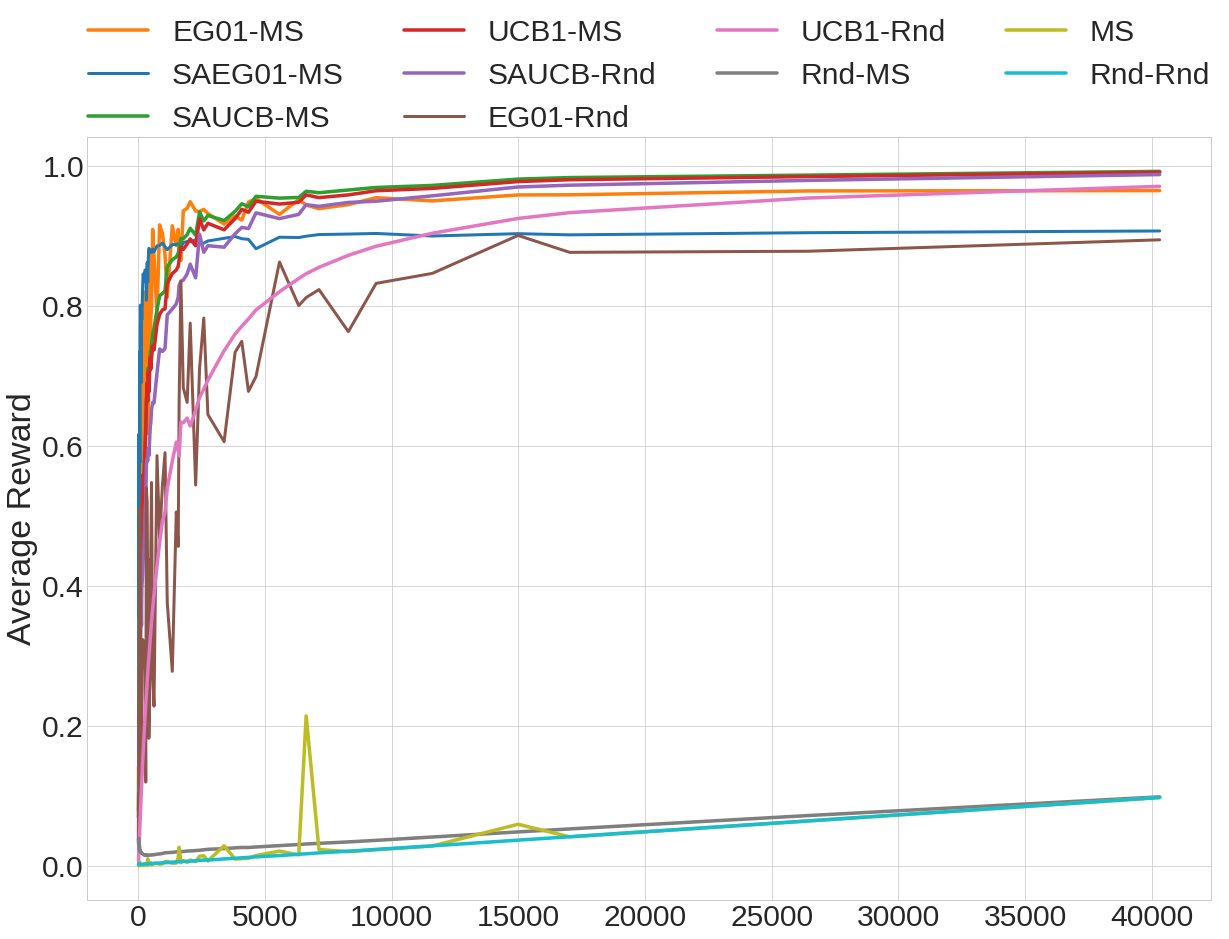

In [8]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')

merged_df = merged_df.sort_values('num_iocs')
fig = plt.figure(figsize=(18,13))
marker=""

# multiple line plot
plt.plot('num_iocs', 'EGreedyMostSharedOrder', marker=marker,linewidth=3.5, data=merged_df, label='EG01-MS', color="tab:orange")
plt.plot('num_iocs', 'EGreedyMultiMostSharedOrder', marker=marker,linewidth=3, data=merged_df, label='SAEG01-MS', color="tab:blue")
plt.plot('num_iocs', 'UCB1MultiMostSharedOrder',marker=marker,linewidth=3.5, data=merged_df, label='SAUCB-MS', color="tab:green")
plt.plot('num_iocs', 'UCB1MostSharedOrder', marker=marker, linewidth=3.5, data=merged_df, label='UCB1-MS' ,color="tab:red")
plt.plot('num_iocs', 'UCB1MultiRandomOrder', marker=marker,linewidth=3.5, data=merged_df, label='SAUCB-Rnd', color="tab:purple")
plt.plot('num_iocs', 'EGreedyRandomOrder', marker=marker,linewidth=3, data=merged_df, label='EG01-Rnd', color='tab:brown')
# plt.plot('num_iocs', 'EGreedyMultiRandomOrder', marker=marker,linewidth=3, data=merged_df, label='EGreedy01MultiRandom')
plt.plot('num_iocs', 'UCB1RandomOrder', marker=marker,linewidth=3.5, data=merged_df, label='UCB1-Rnd', color="tab:pink")
plt.plot('num_iocs', 'RandomMostSharedOrder', marker=marker,linewidth=3.5, data=merged_df, label='Rnd-MS', color="tab:gray")
plt.plot('num_iocs', 'MostSharedOrder', marker=marker,linewidth=3.5, data=merged_df, label='MS', color="tab:olive")
plt.plot('num_iocs', 'RandomOrder', marker=marker, linewidth=3.5, data=merged_df,  label='Rnd-Rnd', color="tab:cyan")
####

# fig.suptitle('Average Reward For Number Of Associated Artifacts\n'
#             '(100% of Artifacts found, with all attacks)',fontweight="bold", fontsize=24)
# plt.xlabel('$\\mid D_{i} \\mid $', fontsize=34)
plt.ylabel('Average Reward', fontsize=34)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=5, prop={'size': 30})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.19),
          ncol=4,  prop={'size': 30})
plt.tight_layout()
# save_fig(fig, "budget-reward/reward-niocs-with-ongoing")

# Attack Rank

### Actual Attack Rank

In [11]:
import pandas as pd
import numpy as np
from glob import glob

def merge_ucb_ratings(results_dir, order_name):
    dfs = []
    for ratings in glob(f"{results_dir}/*{order_name}*"):
        df = pd.read_csv(ratings)
        dfs.append(df)
    merged_df = pd.concat(dfs)
    return merged_df

### FP=0, FN=0

In [ ]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "UCB1MostSharedOrder")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "UCB1RandomOrder")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "UCB1MultiMostSharedOrder")
merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "UCB1MultiRandomOrder")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "EGreedyMostSharedOrder")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "EGreedyMultiMostSharedOrder")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "EGreedyRandomOrder")
merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "EGreedyMultiRandomOrder")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_ucb1_mrandom_grouped = merged_df_ucb1_mrandom_grouped.groupby("iteration").mean()

merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()
merged_df_egreedy_mrandom_grouped = merged_df_egreedy_mrandom_grouped.groupby("iteration").mean()


In [ ]:
merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//8).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//8).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//8).mean()
merged_df_ucb1_mrandom_grouped = merged_df_ucb1_mrandom_grouped.groupby(np.arange(len(merged_df_ucb1_mrandom_grouped))//8).mean()

merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//8).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//8).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//8).mean()
merged_df_egreedy_mrandom_grouped = merged_df_egreedy_mrandom_grouped.groupby(np.arange(len(merged_df_egreedy_mrandom_grouped))//8).mean()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Actual Attack Rank on Run (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-0-0-avg")

In [12]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "UCB1MostSharedOrder")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "UCB1RandomOrder")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "UCB1MultiMostSharedOrder")
merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "UCB1MultiRandomOrder")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "EGreedyMostSharedOrder")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "EGreedyMultiMostSharedOrder")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "EGreedyRandomOrder")
merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/0_0", "EGreedyMultiRandomOrder")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Actual Attack Rank on Run (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-0-0")

### FP=0.01, FN=0.1

In [ ]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "UCB1MostSharedOrder")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "UCB1RandomOrder")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "UCB1MultiMostSharedOrder")
merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "UCB1MultiRandomOrder")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "EGreedyMostSharedOrder")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "EGreedyMultiMostSharedOrder")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "EGreedyRandomOrder")
merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "EGreedyMultiRandomOrder")
merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_ucb1_mrandom_grouped = merged_df_ucb1_mrandom_grouped.groupby("iteration").mean()

merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()
merged_df_egreedy_mrandom_grouped = merged_df_egreedy_mrandom_grouped.groupby("iteration").mean()

In [ ]:
merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//8).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//8).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//8).mean()
merged_df_ucb1_mrandom_grouped = merged_df_ucb1_mrandom_grouped.groupby(np.arange(len(merged_df_ucb1_mrandom_grouped))//8).mean()

merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//8).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//8).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//8).mean()
merged_df_egreedy_mrandom_grouped = merged_df_egreedy_mrandom_grouped.groupby(np.arange(len(merged_df_egreedy_mrandom_grouped))//8).mean()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="UCB1MultiMostShared")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="EGreedy01MultiMostShared")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1Random")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1MostShared")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EGreedy01MostShared")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EGreedy01Random")
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Actual Attack Rank on Run (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-001-01-avg")

In [17]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "UCB1MostSharedOrder")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "UCB1RandomOrder")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "UCB1MultiMostSharedOrder")
merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "UCB1MultiRandomOrder")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "EGreedyMostSharedOrder")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "EGreedyMultiMostSharedOrder")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "EGreedyRandomOrder")
merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/001_01", "EGreedyMultiRandomOrder")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

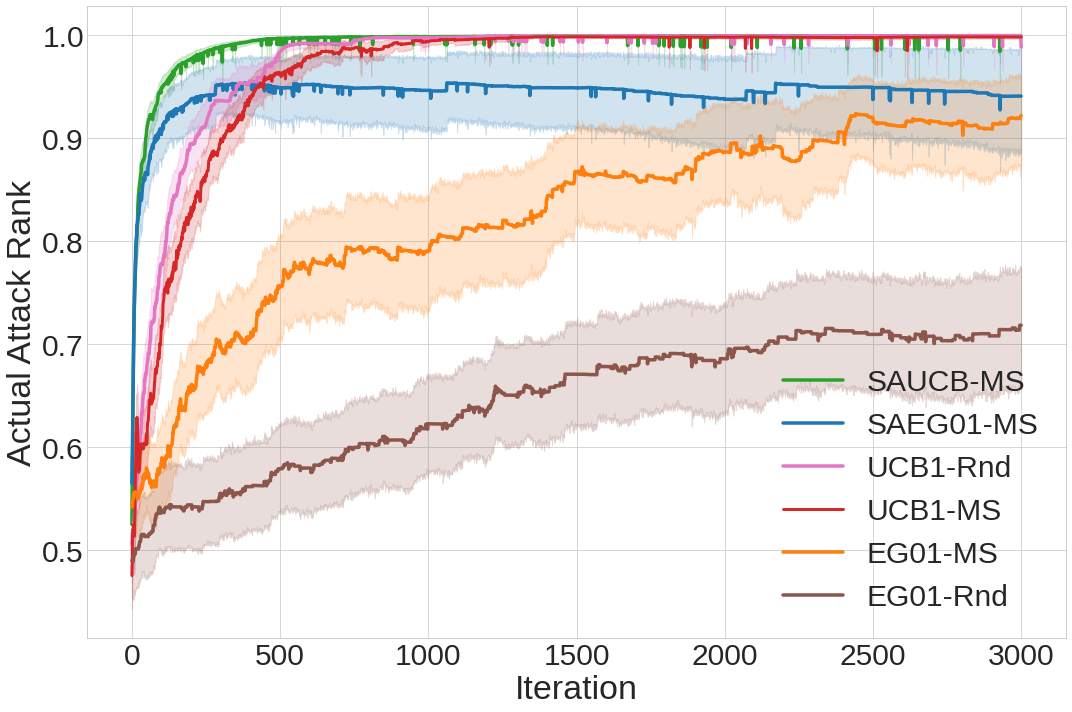

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")

# fig.suptitle('Actual Attack Rank on Run (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-001-01")

### FP=0.05, FN=0.5

In [ ]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "UCB1MostSharedOrder")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "UCB1RandomOrder")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "UCB1MultiMostSharedOrder")
merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "UCB1MultiRandomOrder")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "EGreedyMostSharedOrder")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "EGreedyMultiMostSharedOrder")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "EGreedyRandomOrder")
merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "EGreedyMultiRandomOrder")

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_ucb1_mrandom_grouped = merged_df_ucb1_mrandom_grouped.groupby("iteration").mean()

merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()
merged_df_egreedy_mrandom_grouped = merged_df_egreedy_mrandom_grouped.groupby("iteration").mean()

In [ ]:
merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//8).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//8).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//8).mean()
merged_df_ucb1_mrandom_grouped = merged_df_ucb1_mrandom_grouped.groupby(np.arange(len(merged_df_ucb1_mrandom_grouped))//8).mean()

merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//8).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//8).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//8).mean()
merged_df_egreedy_mrandom_grouped = merged_df_egreedy_mrandom_grouped.groupby(np.arange(len(merged_df_egreedy_mrandom_grouped))//8).mean()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="UCB1MultiMostShared")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="EGreedy01MultiMostShared")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1Random")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1MostShared")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EGreedy01MostShared")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EGreedy01Random")
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Actual Attack Rank on Run (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-005-05-avg")

In [19]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "UCB1MostSharedOrder")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "UCB1RandomOrder")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "UCB1MultiMostSharedOrder")
merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "UCB1MultiRandomOrder")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "EGreedyMostSharedOrder")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "EGreedyMultiMostSharedOrder")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "EGreedyRandomOrder")
merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/epbicsaf-results/2021_1_15/place/005_05", "EGreedyMultiRandomOrder")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

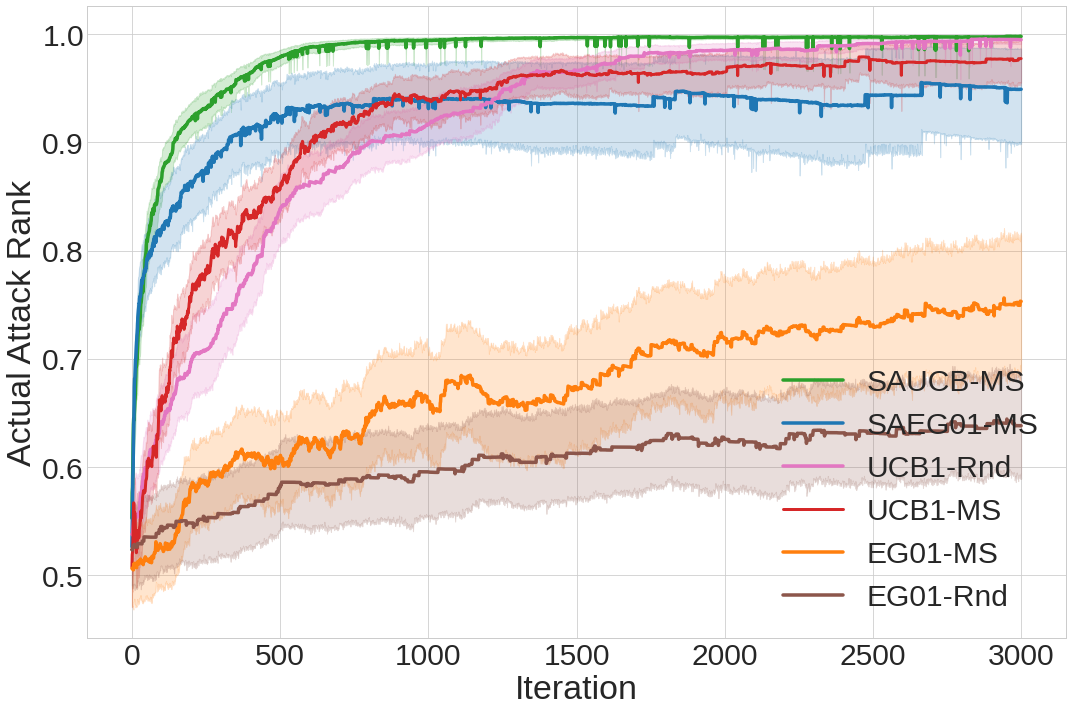

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))
sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Actual Attack Rank on Run (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-005-05")

# Precision / Recall Matrix

In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob

from enum import Enum

num_iocs_df = pd.read_csv("/home/liad/dev/research/notebooks/data-vt-v22/attack_num_iocs_vt_v22.csv")

class ConfusionMatrix(Enum):
    RECALL = 0
    PRECISION = 1
    AVG_REWARD = 2

def get_attack_num_iocs(attack_id):
    df = num_iocs_df[num_iocs_df["attack"] == int(attack_id)]
    return int(df["num_iocs"])

def get_attacks_with_num_iocs(niocs_lower_bound=0, niocs_upper_bound=50000):
    df = num_iocs_df[num_iocs_df["num_iocs"] >= niocs_lower_bound]
    df = num_iocs_df[num_iocs_df["num_iocs"] <= niocs_upper_bound]
    return list(df['attack'])

def merge_matrix(results_dir, avg=False):
    merged_df = None
    g = glob(f"{results_dir}/*.csv")
    for tprfnr in glob(f"{results_dir}/*.csv"):
        attack_id = tprfnr.split("_")[-3]
        df = pd.read_csv(tprfnr)
        if type(merged_df) != pd.DataFrame:
            merged_df = df
        else:
            merged_df = merged_df + df
    if avg:
        merged_df = merged_df / len(list(g))
    return merged_df

def recall_merge_matrix(results_dir, avg=False):
    merged_df = None
    g = glob(f"{results_dir}/*.csv")
    for tprfnr in glob(f"{results_dir}/*.csv"):
        attack_id = tprfnr.split("_")[-3]
        attack_num_iocs = int(num_iocs_df[num_iocs_df['attack'] == int(attack_id)]['num_iocs'])
        df = pd.read_csv(tprfnr)
        df = df / attack_num_iocs
        if type(merged_df) != pd.DataFrame:
            merged_df = df
        else:
            merged_df = merged_df + df
    if avg:
        merged_df = merged_df / len(list(g))
    return merged_df

def confusion_matrix(results_dir, fn=None, fp=None, tn=None, tp=None, cm=ConfusionMatrix.RECALL, avg=False):
    
    if cm == ConfusionMatrix.RECALL:
        df = recall_merge_matrix(results_dir, avg=avg)
    elif cm == ConfusionMatrix.PRECISION:
        df_fn = merge_matrix(results_dir + fn, avg=avg)
        df_fp = merge_matrix(results_dir + fp, avg=avg)
        df_tn = merge_matrix(results_dir + tn, avg=avg)
        df_tp = merge_matrix(results_dir + tp, avg=avg)
        df = df_tp / (df_tp + df_fp)
    
    df['Unnamed: 0'] = [0,0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    df = df.set_index("Unnamed: 0")
    df = df.applymap(lambda x: round(x, 2))
    return df

### SAUCB-MS*

In [ ]:
saucbms_recall_with = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_5430", 
                                    cm=ConfusionMatrix.RECALL, avg=True)
saucbms_precision_with = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_", 
                                   fn="5427",  fp="5428", tn="5429", tp="5430", cm=ConfusionMatrix.PRECISION)

### UCB1-MS*

In [ ]:
ucb1ms_recall_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_2349", 
                                    cm=ConfusionMatrix.RECALL, avg=True)
ucb1ms_precision_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_", 
                                    fn="2352",  fp="2350", tn="2348", tp="2349", cm=ConfusionMatrix.PRECISION)

### SAUCB-Rnd*

In [ ]:
saucbrnd_recall_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_2268", 
                                    cm=ConfusionMatrix.RECALL, avg=True)
saucbrnd_precision_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_", 
                                    fn="2267",  fp="2266", tn="2269", tp="2268", cm=ConfusionMatrix.PRECISION)

### Rnd-Rnd*

In [ ]:
random_recall_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_3_17/merged_15647", 
                                    cm=ConfusionMatrix.RECALL, avg=True)
random_precision_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_3_17/merged_", 
                                    fn="15644",  fp="15645", tn="15646", tp="15647", cm=ConfusionMatrix.PRECISION)

### SAEG01-MS*

In [ ]:
saeg01ms_recall_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_2344", 
                                    cm=ConfusionMatrix.RECALL, avg=True)
saeg01ms_precision_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_", 
                                    fn="2347",  fp="2346", tn="2345", tp="2344", cm=ConfusionMatrix.PRECISION)

### EG01-MS*

In [ ]:
eg01ms_recall_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_", 
                                    fn="2264",  fp="2265", tn="2262", tp="2263", cm=ConfusionMatrix.RECALL)
eg01ms_precision_without = confusion_matrix("/home/liad/dev/research/bgucpu/results/2021_2_27/merged_", 
                                    fn="2264",  fp="2265", tn="2262", tp="2263", cm=ConfusionMatrix.PRECISION)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cmap_rg = sns.diverging_palette(7, 128, as_cmap=True)
res = sns.heatmap(eg01ms_precision_without,annot=True, cmap=cmap_rg, cbar=False,annot_kws={"size":22})

res.set_xticklabels(res.get_xmajorticklabels(), fontsize=24)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=24)
res.set_yticklabels(res.get_yticklabels(), rotation=0)
plt.title('EG01-MS Precision \n(Without Actual Attack, B=3000)', fontsize=22)
plt.xlabel(r'$P_{fp}$', fontsize=34, fontweight="bold")
plt.ylabel(r'$P_{fn}$', fontsize=34,fontweight="bold")
res.invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(font_scale=1.1)
plt.figure(figsize=(10,8))

cmap_rg = sns.diverging_palette(7, 128, as_cmap=True)
res = sns.heatmap(eg01ms_recall_without,annot=True, cmap=cmap_rg, vmax=0.39, cbar=False,annot_kws={"size":24})

res.set_xticklabels(res.get_xmajorticklabels(), fontsize=24)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=24)
res.set_yticklabels(res.get_yticklabels(), rotation=0)
plt.title('EG01-MS Recall \n(Without Actual Attack, B=3000)', fontsize=22)
plt.xlabel(r'$P_{fp}$', fontsize=34, fontweight="bold")
plt.ylabel(r'$P_{fn}$', fontsize=34,fontweight="bold")
res.invert_yaxis()
plt.tight_layout()

# Precison / Recall Graph

### Precision

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(10,8))

CONST_PFN = 1
X = [0.0, 0.01,0.02,0.04,0.08,0.16,0.32,0.64]

plt.plot(X, eg01ms_precision_without.iloc[CONST_PFN], linewidth=3.5, label="EG01-MS", color="tab:orange")
plt.plot(X, saeg01ms_precision_without.iloc[CONST_PFN], linewidth=3.5, label="SAEG01-MS", color="tab:blue")
plt.plot(X, saucbms_precision_without.iloc[CONST_PFN], linewidth=3.5, label="SAUCB-MS", color="tab:green")
plt.plot(X, ucb1ms_precision_without.iloc[CONST_PFN], linewidth=3.5, label="UCB1-MS",color="tab:red")
plt.plot(X, saucbrnd_precision_without.iloc[CONST_PFN], linewidth=3.5, label="SAUCB-Rnd",color="tab:purple")
plt.plot(X, random_precision_without.iloc[CONST_PFN], linewidth=3.5, label="Rnd-Rnd",color="tab:cyan")

fig.suptitle(r'Precision of policies under noise (Without attack, $P_{fn}$ = 0.1, B=3000)', fontsize=24)
plt.xlabel(r'$P_{fp}$', fontsize=34)
plt.ylabel('Precision', fontsize=34)
plt.legend(loc='upper right', prop={'size': 24})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.tight_layout()
# save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-005-05")

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(10,8))

CONST_PFP ='0.01'
X = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]

plt.plot(X, eg01ms_precision_without[CONST_PFP], linewidth=3.5, label="EG01-MS", color="tab:orange")
plt.plot(X, saeg01ms_precision_without[CONST_PFP], linewidth=3.5, label="SAEG01-MS", color="tab:blue")
plt.plot(X, saucbms_precision_without[CONST_PFP], linewidth=3.5, label="SAUCB-MS", color="tab:green")
plt.plot(X, ucb1ms_precision_without[CONST_PFP], linewidth=3.5, label="UCB1-MS",color="tab:red")
plt.plot(X, saucbrnd_precision_without[CONST_PFP], linewidth=3.5, label="SAUCB-Rnd",color="tab:purple")
plt.plot(X, random_precision_without[CONST_PFP], linewidth=3.5, label="Rnd-Rnd",color="tab:cyan")

fig.suptitle(r'Precision of policies under noise (Without attack, $P_{fp}$ = 0.01, B=3000)', fontsize=24)
plt.xlabel(r'$P_{fn}$', fontsize=34)
plt.ylabel('Precision', fontsize=34)
plt.legend(loc='lower left', prop={'size': 24})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.tight_layout()
# save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-005-05")

### Recall

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(10,8))

CONST_PFN = 1
X = [0.0, 0.01,0.02,0.04,0.08,0.16,0.32,0.64]

plt.plot(X, eg01ms_recall_without.iloc[CONST_PFN], linewidth=3.5, label="EG01-MS", color="tab:orange")
plt.plot(X, saeg01ms_recall_without.iloc[CONST_PFN], linewidth=3.5, label="SAEG01-MS", color="tab:blue")
plt.plot(X, saucbms_recall_without.iloc[CONST_PFN], linewidth=3.5, label="SAUCB-MS", color="tab:green")
plt.plot(X, ucb1ms_recall_without.iloc[CONST_PFN], linewidth=3.5, label="UCB1-MS",color="tab:red")
plt.plot(X, saucbrnd_recall_without.iloc[CONST_PFN], linewidth=3.5, label="SAUCB-Rnd",color="tab:purple")
plt.plot(X, random_recall_without.iloc[CONST_PFN], linewidth=3.5, label="Rnd-Rnd",color="tab:cyan")

fig.suptitle(r'Recall of policies under noise (Without ongoing attack  $P_{fn}$ = 0.1, B=3000)', fontsize=24)
plt.xlabel(r'$P_{fp}$', fontsize=34)
plt.ylabel('Recall', fontsize=34)
plt.legend(loc='center left', prop={'size': 24})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.tight_layout()
# save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-005-05")

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(10,8))

CONST_PFP ='0.01'
X = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]

plt.plot(X, eg01ms_recall_without[CONST_PFP], linewidth=3.5, label="EG01-MS", color="tab:orange")
plt.plot(X, saeg01ms_recall_without[CONST_PFP], linewidth=3.5, label="SAEG01-MS", color="tab:blue")
plt.plot(X, saucbms_recall_without[CONST_PFP], linewidth=3.5, label="SAUCB-MS", color="tab:green")
plt.plot(X, ucb1ms_recall_without[CONST_PFP], linewidth=3.5, label="UCB1-MS",color="tab:red")
plt.plot(X, saucbrnd_recall_without[CONST_PFP], linewidth=3.5, label="SAUCB-Rnd",color="tab:purple")
plt.plot(X, random_recall_without[CONST_PFP], linewidth=3.5, label="Rnd-Rnd",color="tab:cyan")

fig.suptitle(r'Recall of policies under noise (Without attack,$P_{fp}$ = 0.01, B=3000)', fontsize=24)
plt.xlabel(r'$P_{fn}$', fontsize=34)
plt.ylabel('Recall', fontsize=34)
plt.legend(loc='upper right', prop={'size': 24})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.tight_layout()
# save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-005-05")

# CM and Reward Over Time

In [9]:
import pandas as pd
import numpy as np
from glob import glob
from IPython import embed
from enum import Enum
from collections import OrderedDict

FREQUENCY = 10
COLUMNS = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64]
ROWS = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

num_iocs_df = pd.read_csv("/home/liad/dev/research/notebooks/data-vt-v22/attack_num_iocs_vt_v22.csv")

class ConfusionMatrix(Enum):
    RECALL = 0
    PRECISION = 1
    AVG_REWARD = 2

def get_attack_num_iocs(attack_id):
    df = num_iocs_df[num_iocs_df["attack"] == int(attack_id)]
    return int(df["num_iocs"])

def get_attacks_with_num_iocs(niocs_lower_bound=0, niocs_upper_bound=50000):
    df = num_iocs_df[num_iocs_df["num_iocs"] >= niocs_lower_bound]
    df = num_iocs_df[num_iocs_df["num_iocs"] <= niocs_upper_bound]
    return list(df['attack'])

def get_attacks_in_dir(results_dir):
    attack_ids = set()
    for attack_file in glob(f"{results_dir}/cm_*_*.csv"):
        attack_id = attack_file.split("_")[-3]
        attack_ids.add(attack_id)
    return attack_ids
    
def get_attack_over_time(results_dir, attack_id, iterations, measure, rfp=None, rfn=None, avg_it=2):
    i = 0
    dfs = {}
    attack_num_iocs = -1
    
    # create data frame for each iteration
    while (i <= iterations):
        if rfp == None and rfp == None:
            dfs[i] = pd.DataFrame(columns=COLUMNS, index=ROWS)
        i += FREQUENCY
    
    for attack_file in glob(f"{results_dir}/cm_*_{attack_id}_*_*.csv"):
        attack_file_df = pd.read_csv(attack_file)
        # each attack is a single configuration, i.e. single fp and fn values.
        for r in attack_file_df.iterrows():
            it = r[1]['iteration']
            fp = r[1]['ex_fp']
            fn = r[1]['ex_fn']
            cm_tp, cm_tn, cm_fp, cm_fn = r[1]['cm_tp'],r[1]['cm_tn'],r[1]['cm_fp'],r[1]['cm_fn']
            
            if (it > iterations):
                # sometimes we will ask for less iterations then available
                # thus no need to keep going
                break
                
            if measure == ConfusionMatrix.AVG_REWARD:
                mes = r[1]['avg_rew']
            elif measure == ConfusionMatrix.RECALL:
                if attack_num_iocs < 0:
                    attack_num_iocs = get_attack_num_iocs(attack_id)
                mes = cm_tp / float(attack_num_iocs)
            elif measure == ConfusionMatrix.PRECISION:
                mes = cm_tp / float(cm_tp + cm_fp)
            
            # set measure in corresponding df and corresponding fp and fn
            if rfp == None and rfn == None:
                try:
                    # already there is a value
                    if not pd.isna(dfs[it][fp][fn]):
                        if type(dfs[it][fp][fn]) is list:
                            dfs[it][fp][fn].append(mes)
                            if len(dfs[it][fp][fn]) == avg_it:
                                # put mean instead of accumulated values
                                dfs[it][fp][fn] = np.array(dfs[it][fp][fn]).mean()
                        else:
                            # create a new list of values
                            dfs[it][fp][fn] = [dfs[it][fp][fn], mes]
                            if len(dfs[it][fp][fn]) == avg_it:
                                # put mean instead of accumulated values
                                dfs[it][fp][fn] = np.array(dfs[it][fp][fn]).mean()
                                print("in mean")
                    else:
                        dfs[it][fp][fn] = mes
                except:
                    pass
            elif (rfp and rfn == None):
                if rfp == fp:
                    pass
            elif (rfp == None and rfn):
                if rfn == fn:
                    pass
            # measure requested in specific fn/fp
            elif (fp == rfp and fn == rfn):
                dfs[it] = mes
    print(".", end=" ")
    return dfs

def get_attacks_over_time(results_dir, iterations, measure, avg=True, rfp=None, rfn=None):
    attacks_in_dir = get_attacks_in_dir(results_dir)
    attack_results = {}
    
    for attack in attacks_in_dir:
        print(f"Computing {attack}")
        attack_results[attack] = get_attack_over_time(results_dir, attack_id=attack, iterations=iterations,
                                                     measure=measure, rfp=rfp, rfn=rfn)
    temp = []
    if avg:
        if rfp == None and rfn == None:
            for k,v in attack_results.items():
                v_array = list(v.values())
                v_array = np.array([d.to_numpy() for d in v_array])
                
                if len(temp) == 0:
                    temp = v_array
                else:
                    temp += v_array
            return dict(zip(v.keys(), temp / len(attacks_in_dir)))
        else:
            for k,v in attack_results.items():
                v_array = np.array(list(v.values()))
                if len(temp) == 0:
                    temp = v_array
                else:
                    temp += v_array
            return dict(zip(v.keys(), temp / len(attacks_in_dir)))
    else:
        return attack_results
        

### Average Reward (Big Attacks) With Actual Attack

In [32]:
ucb1rnd_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90429",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
rnd_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90425",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
saucbms_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90426",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
saeg01ms_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90422",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
ucb1ms_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90428",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
rndms_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90431",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
eg01rnd_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90424",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
saucbrnd_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90427",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
ms_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90430",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
eg01ms_avgrew_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90423",
                attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)

. . . . . . . . . . 

([<matplotlib.axis.YTick at 0x7f23b9539110>,
 <a list of 6 Text major ticklabel objects>)

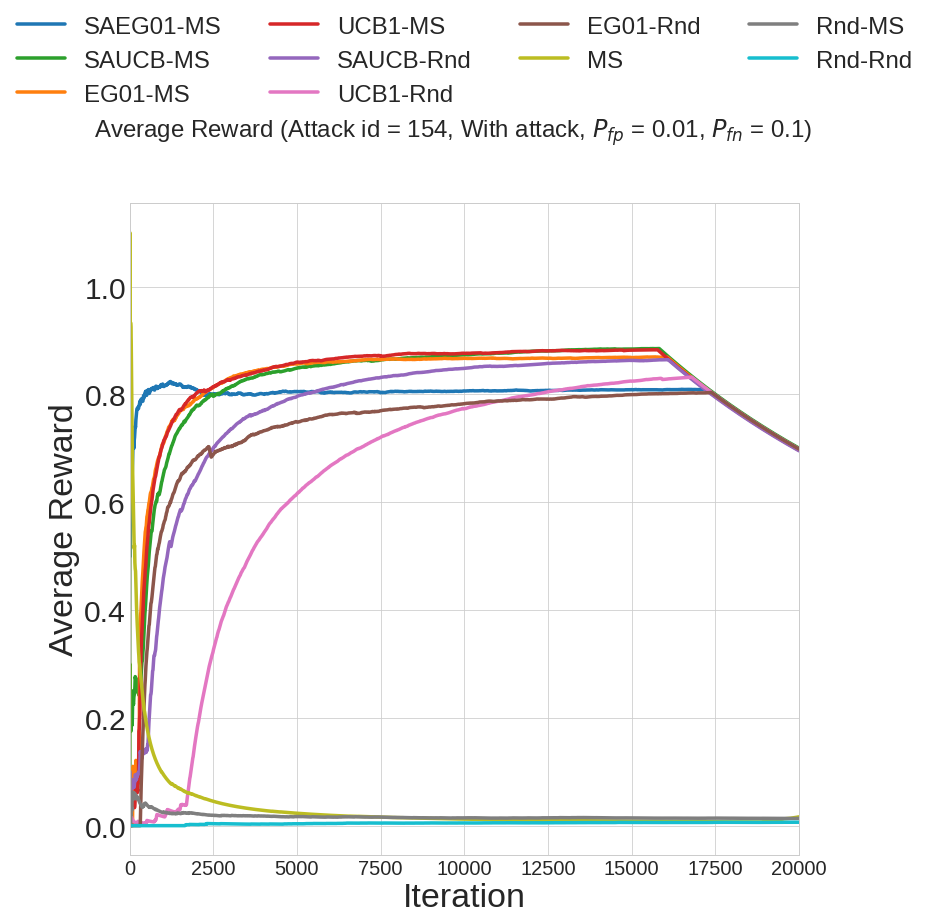

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12,12))
plt.xlim([0,20000])

FP=0.01
FN=0.1

plt.plot(list(saeg01ms_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in saeg01ms_avgrew_with.items()],
         linewidth=3.5, label="SAEG01-MS", color="tab:blue")

plt.plot(list(saucbms_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in saucbms_avgrew_with.items()],
         linewidth=3.5, label="SAUCB-MS", color="tab:green")

plt.plot(list(eg01ms_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in eg01ms_avgrew_with.items()],
         linewidth=3.5, label="EG01-MS", color="tab:orange")

plt.plot(list(ucb1ms_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in ucb1ms_avgrew_with.items()],
         linewidth=3.5, label="UCB1-MS", color="tab:red")

plt.plot(list(saucbrnd_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in saucbrnd_avgrew_with.items()],
         linewidth=3.5, label="SAUCB-Rnd", color="tab:purple")

plt.plot(list(ucb1rnd_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in ucb1rnd_avgrew_with.items()],
         linewidth=3.5, label="UCB1-Rnd", color="tab:pink")

plt.plot(list(eg01rnd_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in eg01rnd_avgrew_with.items()],
         linewidth=3.5, label="EG01-Rnd", color="tab:brown")

plt.plot(list(ms_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in ms_avgrew_with.items()],
         linewidth=3.5, label="MS", color="tab:olive")

plt.plot(list(rndms_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in rndms_avgrew_with.items()],
         linewidth=3.5, label="Rnd-MS", color="tab:gray")

plt.plot(list(rnd_avgrew_with.keys()),
         [v.loc[FN][FP] for k, v in rnd_avgrew_with.items()],
         linewidth=3.5, label="Rnd-Rnd", color="tab:cyan")

fig.suptitle(r'Average Reward (Attack id = 154, With attack, $P_{fp}$ = ' + str(FP) +  r', $P_{fn}$ = ' + str(FN) + r')', fontsize=24)

plt.xlabel("Iteration", fontsize=34)
plt.ylabel('Average Reward', fontsize=34)
# plt.legend(loc='lower right', prop={'size': 24})
plt.legend(loc=5, prop={'size': 24})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.32),
          ncol=4,  prop={'size': 24})
plt.xticks(fontsize=20)
plt.yticks([0. ,  0.2,  0.4,  0.6,  0.8,  1.],fontsize=30)

### Average Reward Example Without Actual Attack

In [38]:
ucb1rnd_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90439",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
rnd_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90435",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
saucbms_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90436",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
saeg01ms_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90432",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
ucb1ms_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90438",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
rndms_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90441",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
eg01rnd_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90434",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
saucbrnd_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90437",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
ms_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90440",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)
eg01ms_avgrew_without = get_attack_over_time(results_dir="/home/liad/dev/research/bgucpu/results/2021_4_5/merged_90433",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.AVG_REWARD)

. . . . . . . . . . 

([<matplotlib.axis.YTick at 0x7f23b980acd0>,
 <a list of 6 Text major ticklabel objects>)

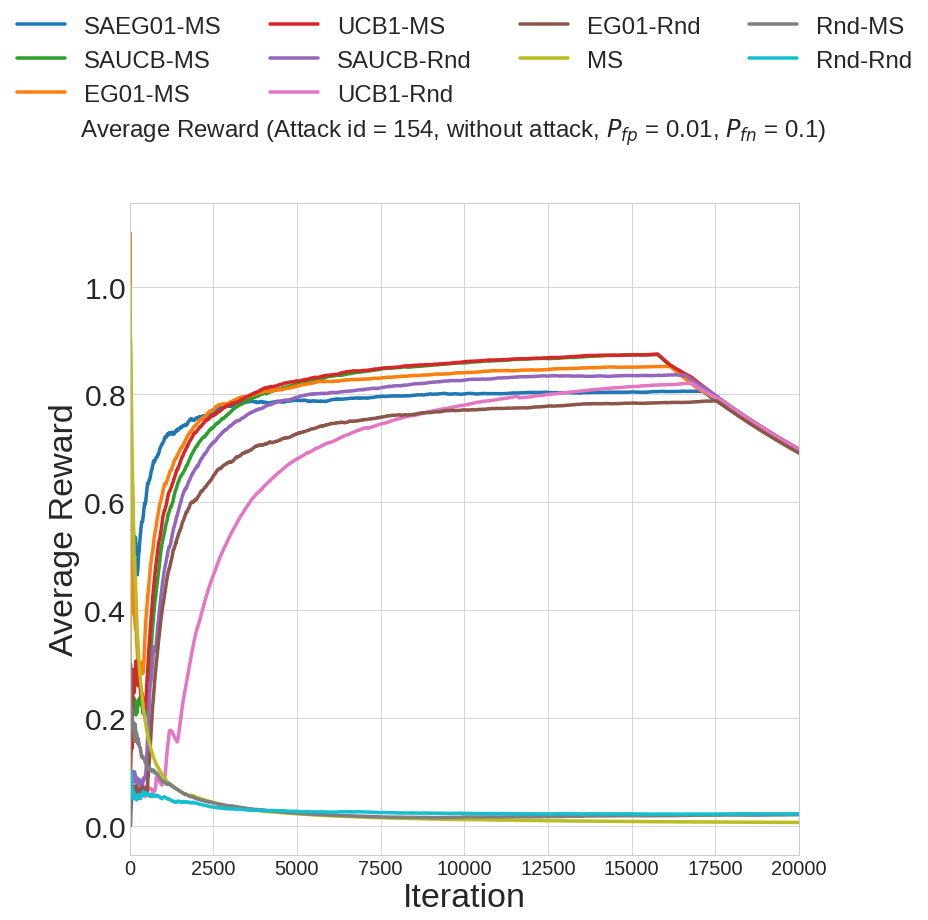

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12,12))
plt.xlim([0,20000])

FP=0.01
FN=0.1

plt.plot(list(saeg01ms_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in saeg01ms_avgrew_without.items()],
         linewidth=3.5, label="SAEG01-MS", color="tab:blue")

plt.plot(list(saucbms_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in saucbms_avgrew_without.items()],
         linewidth=3.5, label="SAUCB-MS", color="tab:green")

plt.plot(list(eg01ms_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in eg01ms_avgrew_without.items()],
         linewidth=3.5, label="EG01-MS", color="tab:orange")

plt.plot(list(ucb1ms_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in ucb1ms_avgrew_without.items()],
         linewidth=3.5, label="UCB1-MS", color="tab:red")

plt.plot(list(saucbrnd_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in saucbrnd_avgrew_without.items()],
         linewidth=3.5, label="SAUCB-Rnd", color="tab:purple")

plt.plot(list(ucb1rnd_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in ucb1rnd_avgrew_without.items()],
         linewidth=3.5, label="UCB1-Rnd", color="tab:pink")

plt.plot(list(eg01rnd_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in eg01rnd_avgrew_without.items()],
         linewidth=3.5, label="EG01-Rnd", color="tab:brown")

plt.plot(list(ms_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in ms_avgrew_without.items()],
         linewidth=3.5, label="MS", color="tab:olive")

plt.plot(list(rndms_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in rndms_avgrew_without.items()],
         linewidth=3.5, label="Rnd-MS", color="tab:gray")

plt.plot(list(rnd_avgrew_without.keys()),
         [v.loc[FN][FP] for k, v in rnd_avgrew_without.items()],
         linewidth=3.5, label="Rnd-Rnd", color="tab:cyan")

fig.suptitle(r'Average Reward (Attack id = 154, without attack, $P_{fp}$ = ' + str(FP) +  r', $P_{fn}$ = ' + str(FN) + r')', fontsize=24)

plt.xlabel("Iteration", fontsize=34)
plt.ylabel('Average Reward', fontsize=34)
# plt.legend(loc='lower right', prop={'size': 24})
plt.legend(loc=5, prop={'size': 24})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.32),
          ncol=4,  prop={'size': 24})
plt.xticks(fontsize=20)
plt.yticks([0. ,  0.2,  0.4,  0.6,  0.8,  1.],fontsize=30)

### Precision Example With Actual Attack

In [19]:
ucb1rnd_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90429",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
rnd_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90425",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
saucbms_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90426",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
saeg01ms_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90422",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
ucb1ms_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90428",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
rndms_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90431",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
eg01rnd_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90424",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
saucbrnd_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90427",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
ms_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90430",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
eg01ms_prec_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90423",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)

/home/liad/miniconda3/envs/jnotebook/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


. . . . . . . . . . 

([<matplotlib.axis.YTick at 0x7f75b5398f10>,
 <a list of 6 Text major ticklabel objects>)

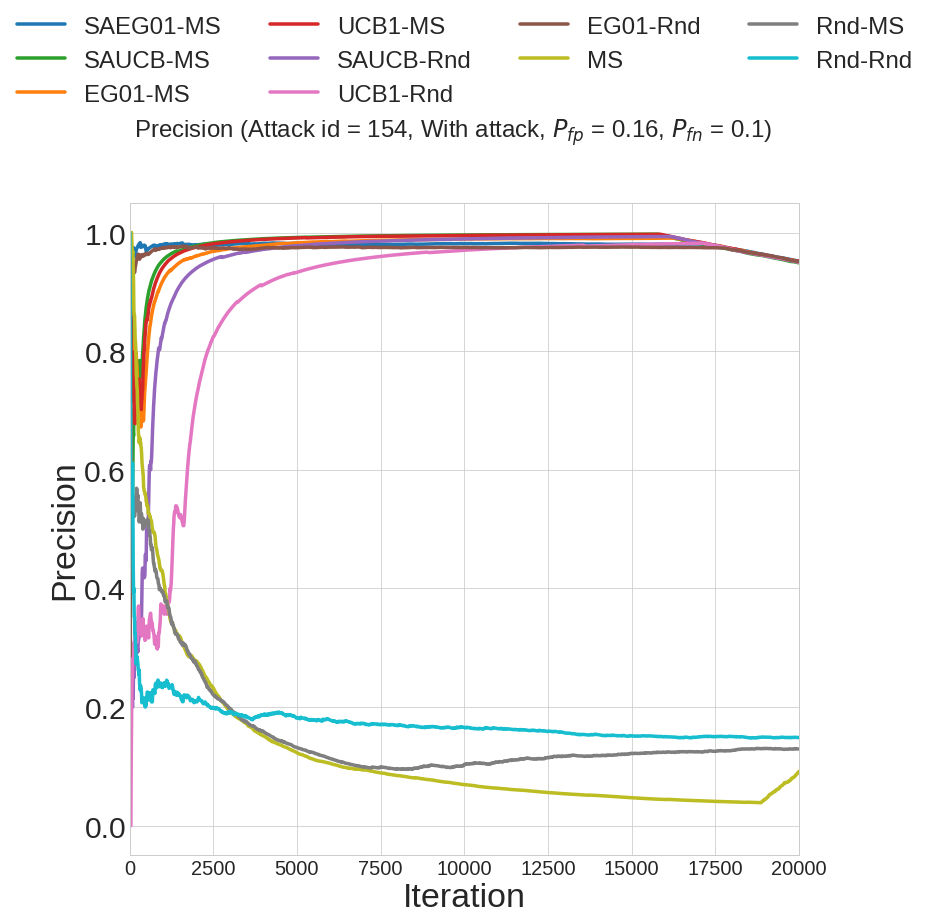

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12,12))
plt.xlim([0,20000])

FP=0.16
FN=0.1

plt.plot(list(saeg01ms_prec_with.keys()),
         [v.loc[FN][FP] for k, v in saeg01ms_prec_with.items()],
         linewidth=3.5, label="SAEG01-MS", color="tab:blue")

plt.plot(list(saucbms_prec_with.keys()),
         [v.loc[FN][FP] for k, v in saucbms_prec_with.items()],
         linewidth=3.5, label="SAUCB-MS", color="tab:green")

plt.plot(list(eg01ms_prec_with.keys()),
         [v.loc[FN][FP] for k, v in eg01ms_prec_with.items()],
         linewidth=3.5, label="EG01-MS", color="tab:orange")

plt.plot(list(ucb1ms_prec_with.keys()),
         [v.loc[FN][FP] for k, v in ucb1ms_prec_with.items()],
         linewidth=3.5, label="UCB1-MS", color="tab:red")

plt.plot(list(saucbrnd_prec_with.keys()),
         [v.loc[FN][FP] for k, v in saucbrnd_prec_with.items()],
         linewidth=3.5, label="SAUCB-Rnd", color="tab:purple")

plt.plot(list(ucb1rnd_prec_with.keys()),
         [v.loc[FN][FP] for k, v in ucb1rnd_prec_with.items()],
         linewidth=3.5, label="UCB1-Rnd", color="tab:pink")

plt.plot(list(eg01rnd_prec_with.keys()),
         [v.loc[FN][FP] for k, v in eg01rnd_prec_with.items()],
         linewidth=3.5, label="EG01-Rnd", color="tab:brown")

plt.plot(list(ms_prec_with.keys()),
         [v.loc[FN][FP] for k, v in ms_prec_with.items()],
         linewidth=3.5, label="MS", color="tab:olive")

plt.plot(list(rndms_prec_with.keys()),
         [v.loc[FN][FP] for k, v in rndms_prec_with.items()],
         linewidth=3.5, label="Rnd-MS", color="tab:gray")

plt.plot(list(rnd_prec_with.keys()),
         [v.loc[FN][FP] for k, v in rnd_prec_with.items()],
         linewidth=3.5, label="Rnd-Rnd", color="tab:cyan")

fig.suptitle(r'Precision (Attack id = 154, With attack, $P_{fp}$ = ' + str(FP) +  r', $P_{fn}$ = ' + str(FN) + r')', fontsize=24)

plt.xlabel("Iteration", fontsize=34)
plt.ylabel('Precision', fontsize=34)
# plt.legend(loc='lower right', prop={'size': 24})
plt.legend(loc=5, prop={'size': 24})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.32),
          ncol=4,  prop={'size': 24})
plt.xticks(fontsize=20)
plt.yticks([0. ,  0.2,  0.4,  0.6,  0.8,  1.],fontsize=30)

### Average Precision Example Without Actual Attack

In [16]:
ucb1rnd_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90439",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
rnd_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90435",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
saucbms_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90436",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
saeg01ms_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90432",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
ucb1ms_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90438",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
rndms_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90441",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
eg01rnd_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90434",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
saucbrnd_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90437",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
ms_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90440",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)
eg01ms_prec_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90433",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.PRECISION)

/home/liad/miniconda3/envs/jnotebook/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


. . . . . . . . . . 

([<matplotlib.axis.YTick at 0x7f75cffcf350>,
 <a list of 6 Text major ticklabel objects>)

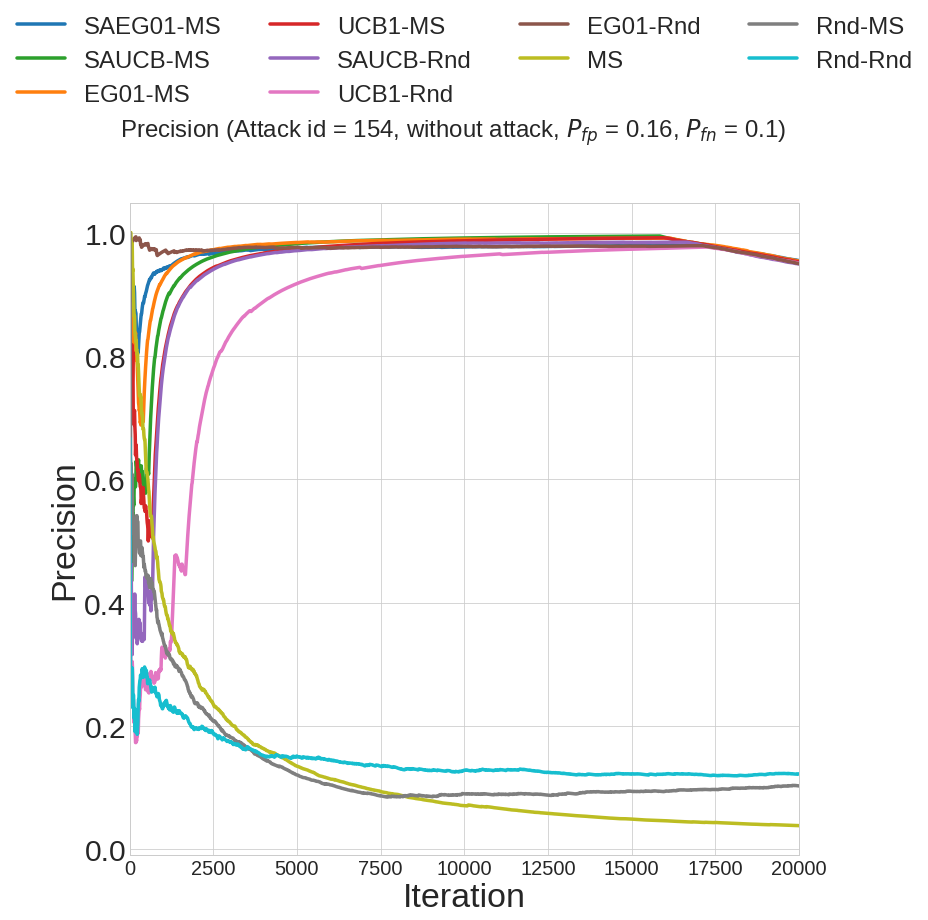

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12,12))
plt.xlim([0,20000])

FP=0.16
FN=0.1

plt.plot(list(saeg01ms_prec_without.keys()),
         [v.loc[FN][FP] for k, v in saeg01ms_prec_without.items()],
         linewidth=3.5, label="SAEG01-MS", color="tab:blue")

plt.plot(list(saucbms_prec_without.keys()),
         [v.loc[FN][FP] for k, v in saucbms_prec_without.items()],
         linewidth=3.5, label="SAUCB-MS", color="tab:green")

plt.plot(list(eg01ms_prec_without.keys()),
         [v.loc[FN][FP] for k, v in eg01ms_prec_without.items()],
         linewidth=3.5, label="EG01-MS", color="tab:orange")

plt.plot(list(ucb1ms_prec_without.keys()),
         [v.loc[FN][FP] for k, v in ucb1ms_prec_without.items()],
         linewidth=3.5, label="UCB1-MS", color="tab:red")

plt.plot(list(saucbrnd_prec_without.keys()),
         [v.loc[FN][FP] for k, v in saucbrnd_prec_without.items()],
         linewidth=3.5, label="SAUCB-Rnd", color="tab:purple")

plt.plot(list(ucb1rnd_prec_without.keys()),
         [v.loc[FN][FP] for k, v in ucb1rnd_prec_without.items()],
         linewidth=3.5, label="UCB1-Rnd", color="tab:pink")

plt.plot(list(eg01rnd_prec_without.keys()),
         [v.loc[FN][FP] for k, v in eg01rnd_prec_without.items()],
         linewidth=3.5, label="EG01-Rnd", color="tab:brown")

plt.plot(list(ms_prec_without.keys()),
         [v.loc[FN][FP] for k, v in ms_prec_without.items()],
         linewidth=3.5, label="MS", color="tab:olive")

plt.plot(list(rndms_prec_without.keys()),
         [v.loc[FN][FP] for k, v in rndms_prec_without.items()],
         linewidth=3.5, label="Rnd-MS", color="tab:gray")

plt.plot(list(rnd_prec_without.keys()),
         [v.loc[FN][FP] for k, v in rnd_prec_without.items()],
         linewidth=3.5, label="Rnd-Rnd", color="tab:cyan")

fig.suptitle(r'Precision (Attack id = 154, without attack, $P_{fp}$ = ' + str(FP) +  r', $P_{fn}$ = ' + str(FN) + r')', fontsize=24)

plt.xlabel("Iteration", fontsize=34)
plt.ylabel('Precision', fontsize=34)
# plt.legend(loc='lower right', prop={'size': 24})
plt.legend(loc=5, prop={'size': 24})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.32),
          ncol=4,  prop={'size': 24})
plt.xticks(fontsize=20)
plt.yticks([0. ,  0.2,  0.4,  0.6,  0.8,  1.],fontsize=30)

### Average Recall Example With Actual Attack

In [57]:
ucb1rnd_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90429",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
rnd_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90425",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
saucbms_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90426",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
saeg01ms_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90422",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
ucb1ms_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90428",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
rndms_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90431",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
eg01rnd_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90424",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
saucbrnd_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90427",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
ms_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90430",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
eg01ms_recall_with = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90423",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)

. . . . . . . . . . 

([<matplotlib.axis.YTick at 0x7f23a54a0e50>,
 <a list of 6 Text major ticklabel objects>)

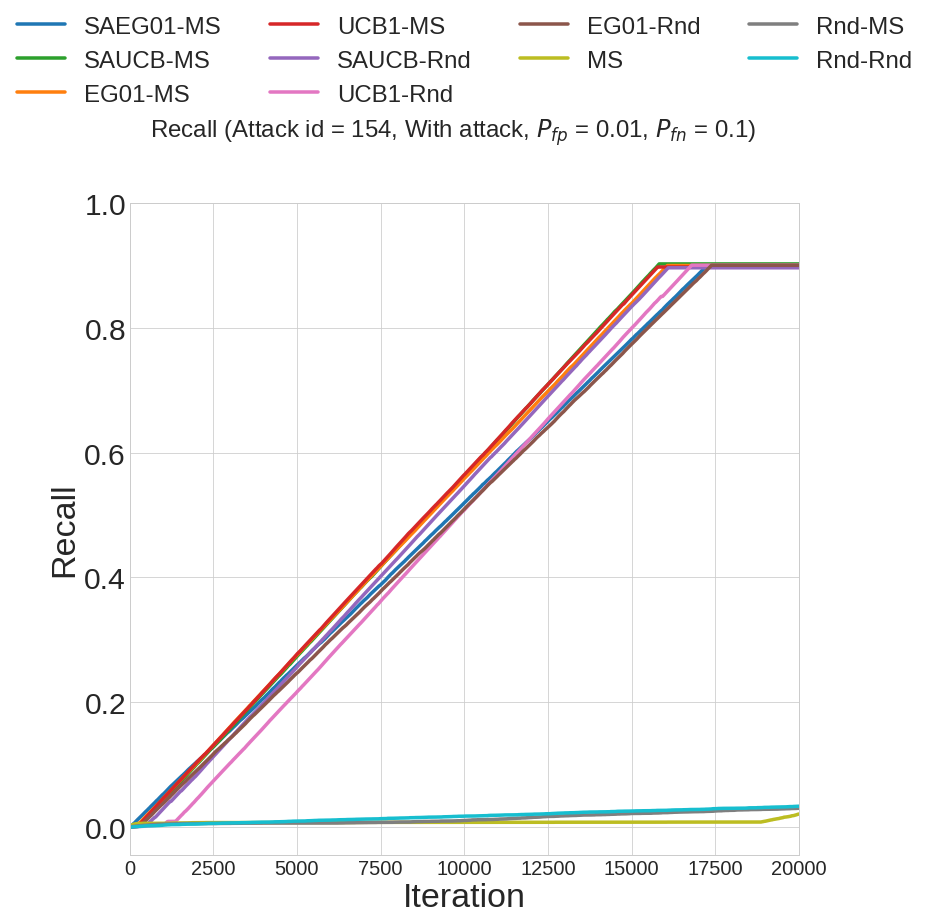

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12,12))
plt.xlim([0,20000])

FP=0.01
FN=0.1

plt.plot(list(saeg01ms_recall_with.keys()),
         [v.loc[FN][FP] for k, v in saeg01ms_recall_with.items()],
         linewidth=3.5, label="SAEG01-MS", color="tab:blue")

plt.plot(list(saucbms_recall_with.keys()),
         [v.loc[FN][FP] for k, v in saucbms_recall_with.items()],
         linewidth=3.5, label="SAUCB-MS", color="tab:green")

plt.plot(list(eg01ms_recall_with.keys()),
         [v.loc[FN][FP] for k, v in eg01ms_recall_with.items()],
         linewidth=3.5, label="EG01-MS", color="tab:orange")

plt.plot(list(ucb1ms_recall_with.keys()),
         [v.loc[FN][FP] for k, v in ucb1ms_recall_with.items()],
         linewidth=3.5, label="UCB1-MS", color="tab:red")

plt.plot(list(saucbrnd_recall_with.keys()),
         [v.loc[FN][FP] for k, v in saucbrnd_recall_with.items()],
         linewidth=3.5, label="SAUCB-Rnd", color="tab:purple")

plt.plot(list(ucb1rnd_recall_with.keys()),
         [v.loc[FN][FP] for k, v in ucb1rnd_recall_with.items()],
         linewidth=3.5, label="UCB1-Rnd", color="tab:pink")

plt.plot(list(eg01rnd_recall_with.keys()),
         [v.loc[FN][FP] for k, v in eg01rnd_recall_with.items()],
         linewidth=3.5, label="EG01-Rnd", color="tab:brown")

plt.plot(list(ms_recall_with.keys()),
         [v.loc[FN][FP] for k, v in ms_recall_with.items()],
         linewidth=3.5, label="MS", color="tab:olive")

plt.plot(list(rndms_recall_with.keys()),
         [v.loc[FN][FP] for k, v in rndms_recall_with.items()],
         linewidth=3.5, label="Rnd-MS", color="tab:gray")

plt.plot(list(rnd_recall_with.keys()),
         [v.loc[FN][FP] for k, v in rnd_recall_with.items()],
         linewidth=3.5, label="Rnd-Rnd", color="tab:cyan")

fig.suptitle(r'Recall (Attack id = 154, With attack, $P_{fp}$ = ' + str(FP) +  r', $P_{fn}$ = ' + str(FN) + r')', fontsize=24)

plt.xlabel("Iteration", fontsize=34)
plt.ylabel('Recall', fontsize=34)
# plt.legend(loc='lower right', prop={'size': 24})
plt.legend(loc=5, prop={'size': 24})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.32),
          ncol=4,  prop={'size': 24})
plt.xticks(fontsize=20)
plt.yticks([0. ,  0.2,  0.4,  0.6,  0.8,  1.],fontsize=30)

### Average Recall Example Without Actual Attack

In [60]:
ucb1rnd_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90439",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
rnd_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90435",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
saucbms_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90436",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
saeg01ms_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90432",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
ucb1ms_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90438",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
rndms_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90441",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
eg01rnd_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90434",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
saucbrnd_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90437",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
ms_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90440",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)
eg01ms_recall_without = get_attack_over_time(results_dir="/home/liad/dev/research/epbicsaf-results/2021_4_5/merged_90433",
                 attack_id=154, iterations=20000, measure=ConfusionMatrix.RECALL)

. . . . . . . . . . 

([<matplotlib.axis.YTick at 0x7f237be37a10>,
 <a list of 6 Text major ticklabel objects>)

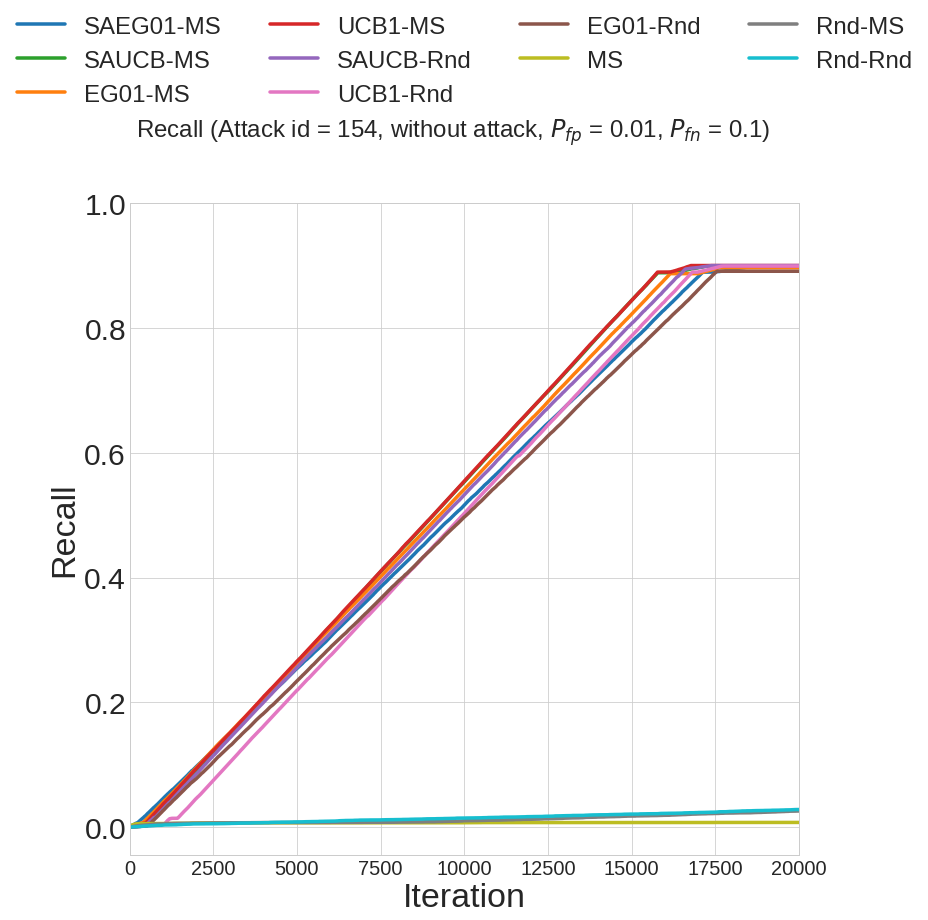

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(12,12))
plt.xlim([0,20000])

FP=0.01
FN=0.1

plt.plot(list(saeg01ms_recall_without.keys()),
         [v.loc[FN][FP] for k, v in saeg01ms_recall_without.items()],
         linewidth=3.5, label="SAEG01-MS", color="tab:blue")

plt.plot(list(saucbms_recall_without.keys()),
         [v.loc[FN][FP] for k, v in saucbms_recall_without.items()],
         linewidth=3.5, label="SAUCB-MS", color="tab:green")

plt.plot(list(eg01ms_recall_without.keys()),
         [v.loc[FN][FP] for k, v in eg01ms_recall_without.items()],
         linewidth=3.5, label="EG01-MS", color="tab:orange")

plt.plot(list(ucb1ms_recall_without.keys()),
         [v.loc[FN][FP] for k, v in ucb1ms_recall_without.items()],
         linewidth=3.5, label="UCB1-MS", color="tab:red")

plt.plot(list(saucbrnd_recall_without.keys()),
         [v.loc[FN][FP] for k, v in saucbrnd_recall_without.items()],
         linewidth=3.5, label="SAUCB-Rnd", color="tab:purple")

plt.plot(list(ucb1rnd_recall_without.keys()),
         [v.loc[FN][FP] for k, v in ucb1rnd_recall_without.items()],
         linewidth=3.5, label="UCB1-Rnd", color="tab:pink")

plt.plot(list(eg01rnd_recall_without.keys()),
         [v.loc[FN][FP] for k, v in eg01rnd_recall_without.items()],
         linewidth=3.5, label="EG01-Rnd", color="tab:brown")

plt.plot(list(ms_recall_without.keys()),
         [v.loc[FN][FP] for k, v in ms_recall_without.items()],
         linewidth=3.5, label="MS", color="tab:olive")

plt.plot(list(rndms_recall_without.keys()),
         [v.loc[FN][FP] for k, v in rndms_recall_without.items()],
         linewidth=3.5, label="Rnd-MS", color="tab:gray")

plt.plot(list(rnd_recall_without.keys()),
         [v.loc[FN][FP] for k, v in rnd_recall_without.items()],
         linewidth=3.5, label="Rnd-Rnd", color="tab:cyan")

fig.suptitle(r'Recall (Attack id = 154, without attack, $P_{fp}$ = ' + str(FP) +  r', $P_{fn}$ = ' + str(FN) + r')', fontsize=24)

plt.xlabel("Iteration", fontsize=34)
plt.ylabel('Recall', fontsize=34)
# plt.legend(loc='lower right', prop={'size': 24})
plt.legend(loc=5, prop={'size': 24})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.32),
          ncol=4,  prop={'size': 24})
plt.xticks(fontsize=20)
plt.yticks([0. ,  0.2,  0.4,  0.6,  0.8,  1.],fontsize=30)